In [1]:
%autosave 10

Autosaving every 10 seconds


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [8]:
df=pd.read_csv("cleaned_data.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [14]:
x=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [31]:
model=LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [33]:
predictions=model.predict_proba(x_test)
predictions

array([[0.58543276, 0.41456724],
       [0.53445691, 0.46554309],
       [0.88802229, 0.11197771],
       ...,
       [0.58543276, 0.41456724],
       [0.96926576, 0.03073424],
       [0.65049349, 0.34950651]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [34]:
from sklearn import metrics
metrics.roc_auc_score(y_test,predictions[:,1])

0.6224702077902178

_________________________________________________________________________
**Now, plot the ROC curve.**


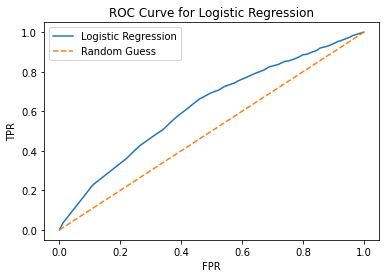

In [42]:
fpr, tpr, thresh = metrics.roc_curve(y_test, predictions[:,1])
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr,tpr,"-")
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression','Random Guess'])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [43]:
precision,recall,thresh=metrics.precision_recall_curve(y_test,predictions[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision - Recall Curve')

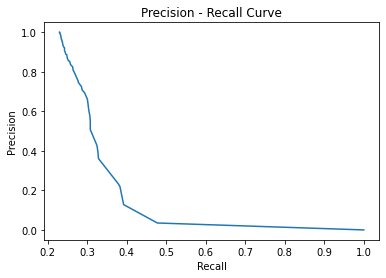

In [46]:
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [47]:
metrics.auc(recall,precision)

0.3350167815213556

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [48]:
training_preds=model.predict_proba(x_train)
training_preds

array([[0.53445691, 0.46554309],
       [0.75107834, 0.24892166],
       [0.90103193, 0.09896807],
       ...,
       [0.58543276, 0.41456724],
       [0.95714143, 0.04285857],
       [0.63464258, 0.36535742]])

In [49]:
metrics.roc_auc_score(y_train,training_preds[:,1])

0.6177228831509552

    How is this different, conceptually and quantitatively, from your earlier calculation?
